In [40]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import time



In [2]:
np.__version__

'1.23.5'

In [3]:
tf.__version__

'2.10.0'

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


## Loading in the Datasets

In [5]:
df = pd.read_csv('store5.csv')

In [6]:
pd.options.display.min_rows = 50
pd.set_option("display.max_columns", None)

In [7]:
df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.000,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.000,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,1456,2013-01-01,5,BOOKS,0.000,0,NaN
5,1457,2013-01-01,5,BREAD/BAKERY,0.000,0,NaN
6,1458,2013-01-01,5,CELEBRATION,0.000,0,NaN
7,1459,2013-01-01,5,CLEANING,0.000,0,NaN
8,1460,2013-01-01,5,DAIRY,0.000,0,NaN
9,1461,2013-01-01,5,DELI,0.000,0,NaN


In [8]:
df.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico     17193
dtype: int64

In [9]:
df.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dcoilwtico     float64
dtype: object

array([[<Axes: title={'center': 'AUTOMOTIVE'}>,
        <Axes: title={'center': 'BABY CARE'}>,
        <Axes: title={'center': 'BEAUTY'}>,
        <Axes: title={'center': 'BEVERAGES'}>,
        <Axes: title={'center': 'BOOKS'}>,
        <Axes: title={'center': 'BREAD/BAKERY'}>],
       [<Axes: title={'center': 'CELEBRATION'}>,
        <Axes: title={'center': 'CLEANING'}>,
        <Axes: title={'center': 'DAIRY'}>,
        <Axes: title={'center': 'DELI'}>,
        <Axes: title={'center': 'EGGS'}>,
        <Axes: title={'center': 'FROZEN FOODS'}>],
       [<Axes: title={'center': 'GROCERY I'}>,
        <Axes: title={'center': 'GROCERY II'}>,
        <Axes: title={'center': 'HARDWARE'}>,
        <Axes: title={'center': 'HOME AND KITCHEN I'}>,
        <Axes: title={'center': 'HOME AND KITCHEN II'}>,
        <Axes: title={'center': 'HOME APPLIANCES'}>],
       [<Axes: title={'center': 'HOME CARE'}>,
        <Axes: title={'center': 'LADIESWEAR'}>,
        <Axes: title={'center': 'LAWN AND GA

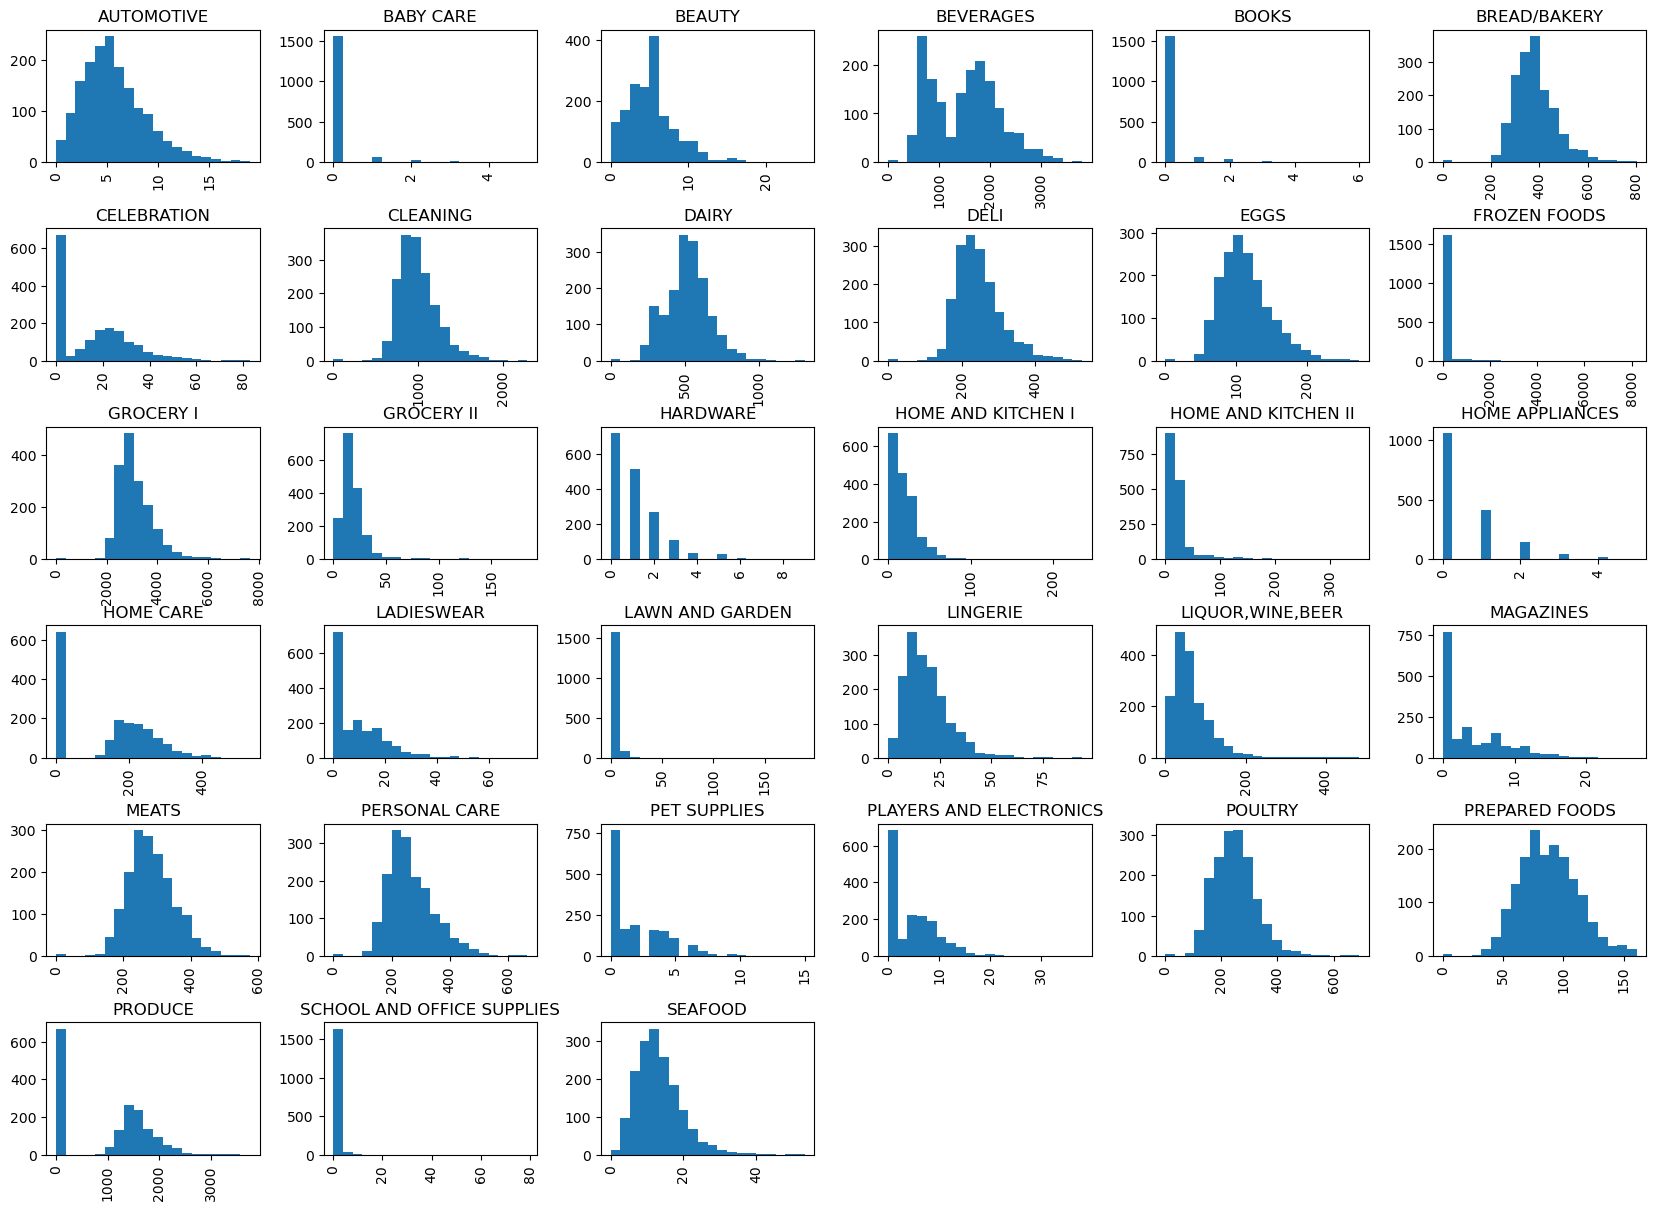

In [10]:
df.hist('sales', by='family', figsize=(20,15), bins=20)

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

# Model for Beverage

## EDA (Beverage)

In [15]:
beverage = df['family']=='BEVERAGES'
beverage = df[beverage]
beverage = beverage.set_index('date') 
beverage

,id,store_nbr,family,sales,onpromotion,dcoilwtico,year,month,day,day_of_week
date,,,,,,,,,,
2013-01-01,1455,5,BEVERAGES,0.0,0,NaN,2013,1,1,1
2013-01-02,3237,5,BEVERAGES,947.0,0,93.14,2013,1,2,2
2013-01-03,5019,5,BEVERAGES,847.0,0,92.97,2013,1,3,3
2013-01-04,6801,5,BEVERAGES,859.0,0,93.12,2013,1,4,4
2013-01-05,8583,5,BEVERAGES,912.0,0,NaN,2013,1,5,5
2013-01-06,10365,5,BEVERAGES,1124.0,0,NaN,2013,1,6,6
2013-01-07,12147,5,BEVERAGES,575.0,0,93.20,2013,1,7,0
2013-01-08,13929,5,BEVERAGES,746.0,0,93.21,2013,1,8,1
2013-01-09,15711,5,BEVERAGES,541.0,0,93.08,2013,1,9,2


c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

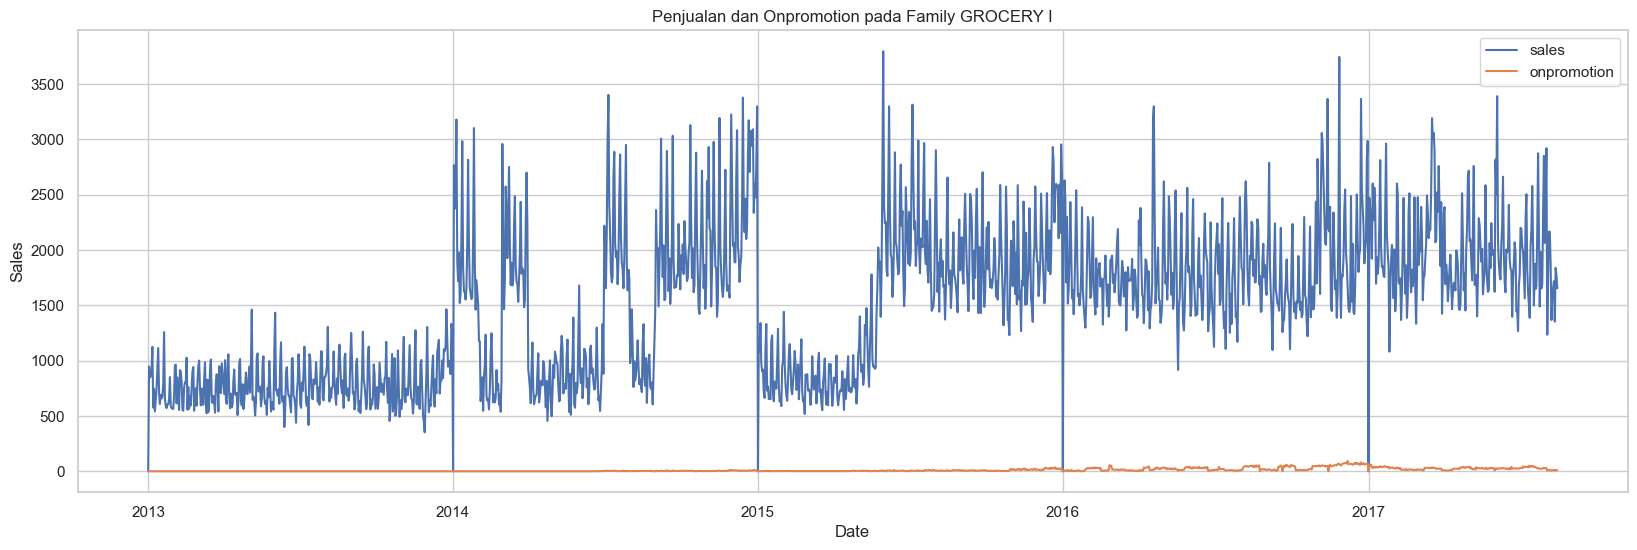

In [16]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')
sns.lineplot(data=beverage, x='date', y='sales', label='sales')
sns.lineplot(data=beverage, x='date', y='onpromotion', label='onpromotion')
plt.title('Penjualan dan Onpromotion pada Family GROCERY I')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Unit Root Test

In [17]:
from statsmodels.tsa.stattools import adfuller, kpss

result1 = adfuller(beverage['sales'],regression = 'n', autolag = 'AIC')
print('Augmented Dickey Fuller Test: None')
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Lag Selected: %f' % result1[2])
print('')

result2 = adfuller(beverage['sales'],regression = 'c', autolag = 'AIC')
print('Augmented Dickey Fuller Test: Intercept')
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Lag Selected: %f' % result2[2])
print('')

result3 = adfuller(beverage['sales'],regression = 'ct', autolag = 'AIC')
print('Augmented Dickey Fuller Test: Trend and Intercept')
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])
print('Lag Selected: %f' % result3[2])
print('')


Augmented Dickey Fuller Test: None
ADF Statistic: -1.070345
p-value: 0.256799
Lag Selected: 22.000000

Augmented Dickey Fuller Test: Intercept
ADF Statistic: -3.853390
p-value: 0.002406
Lag Selected: 22.000000

Augmented Dickey Fuller Test: Trend and Intercept
ADF Statistic: -5.442022
p-value: 0.000030
Lag Selected: 22.000000



In [18]:
def kpss_test(timeseries, regression):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression=f'{regression}', nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    print()

In [62]:
kpss_test(beverage['sales'], 'c')
kpss_test(beverage['sales'], 'ct')

Results of KPSS Test:
Test Statistic            3.622564
p-value                   0.010000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

Results of KPSS Test:
Test Statistic            0.211239
p-value                   0.011785
Lags Used                23.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64



C:\Users\marie\AppData\Local\Temp\ipykernel_13908\2525364159.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression=f'{regression}', nlags="auto")


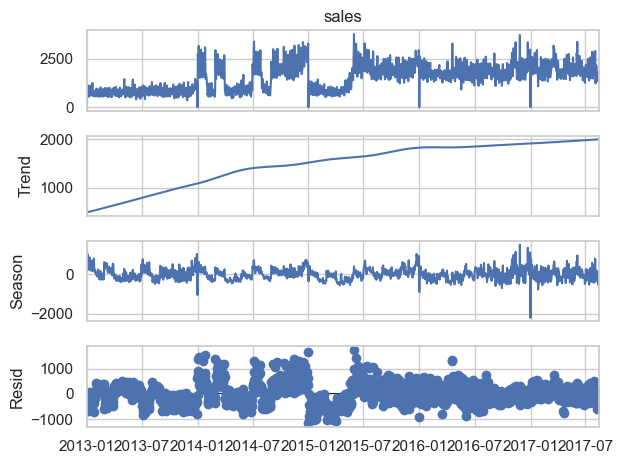

In [20]:
from statsmodels.tsa.seasonal import STL

decompose = STL(beverage['sales'], period = 365).fit()
decompose.plot()
plt.show()

In [21]:
beverage['sales_sa'] = beverage['sales'] - decompose.seasonal
beverage

,id,store_nbr,family,sales,onpromotion,dcoilwtico,year,month,day,day_of_week,sales_sa
date,,,,,,,,,,,
2013-01-01,1455,5,BEVERAGES,0.0,0,NaN,2013,1,1,1,-198.602993
2013-01-02,3237,5,BEVERAGES,947.0,0,93.14,2013,1,2,2,127.233907
2013-01-03,5019,5,BEVERAGES,847.0,0,92.97,2013,1,3,3,174.275081
2013-01-04,6801,5,BEVERAGES,859.0,0,93.12,2013,1,4,4,-171.552940
2013-01-05,8583,5,BEVERAGES,912.0,0,NaN,2013,1,5,5,371.095670
2013-01-06,10365,5,BEVERAGES,1124.0,0,NaN,2013,1,6,6,540.102560
2013-01-07,12147,5,BEVERAGES,575.0,0,93.20,2013,1,7,0,288.224467
2013-01-08,13929,5,BEVERAGES,746.0,0,93.21,2013,1,8,1,459.709598
2013-01-09,15711,5,BEVERAGES,541.0,0,93.08,2013,1,9,2,293.074167


c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

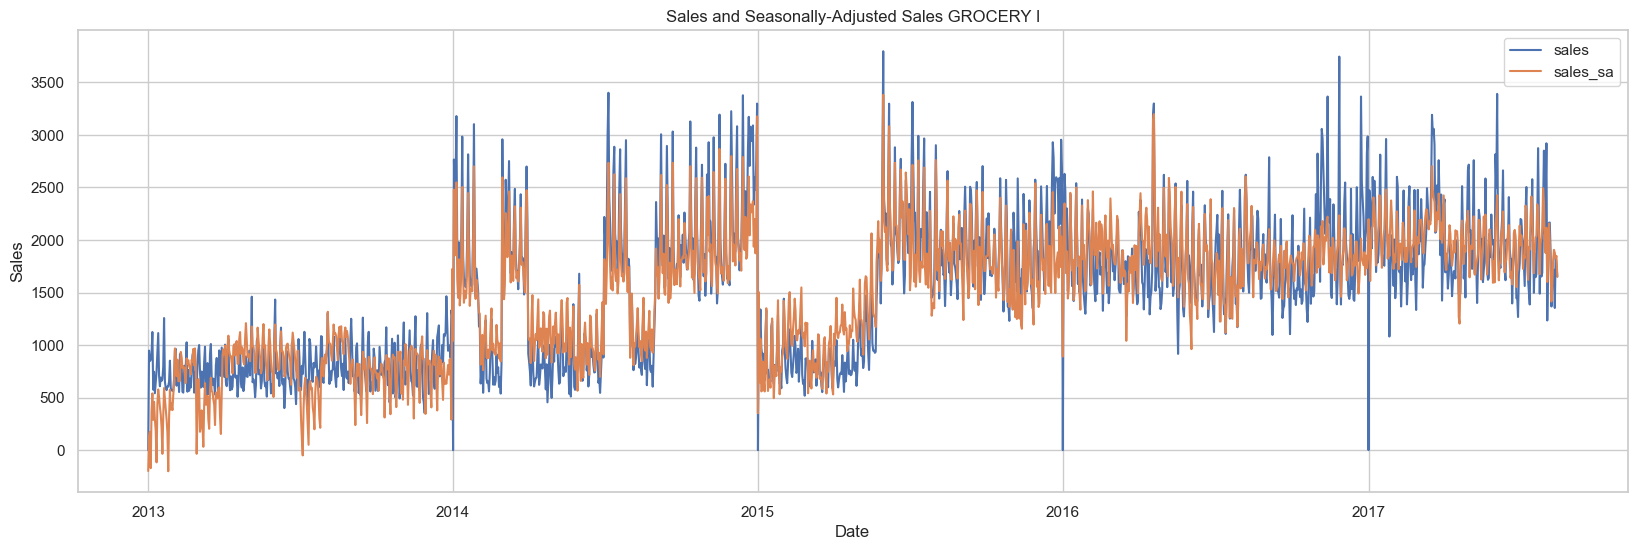

In [22]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')
sns.lineplot(data=beverage, x='date', y='sales', label='sales')
sns.lineplot(data=beverage, x='date', y='sales_sa', label='sales_sa')
plt.title('Sales and Seasonally-Adjusted Sales GROCERY I')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

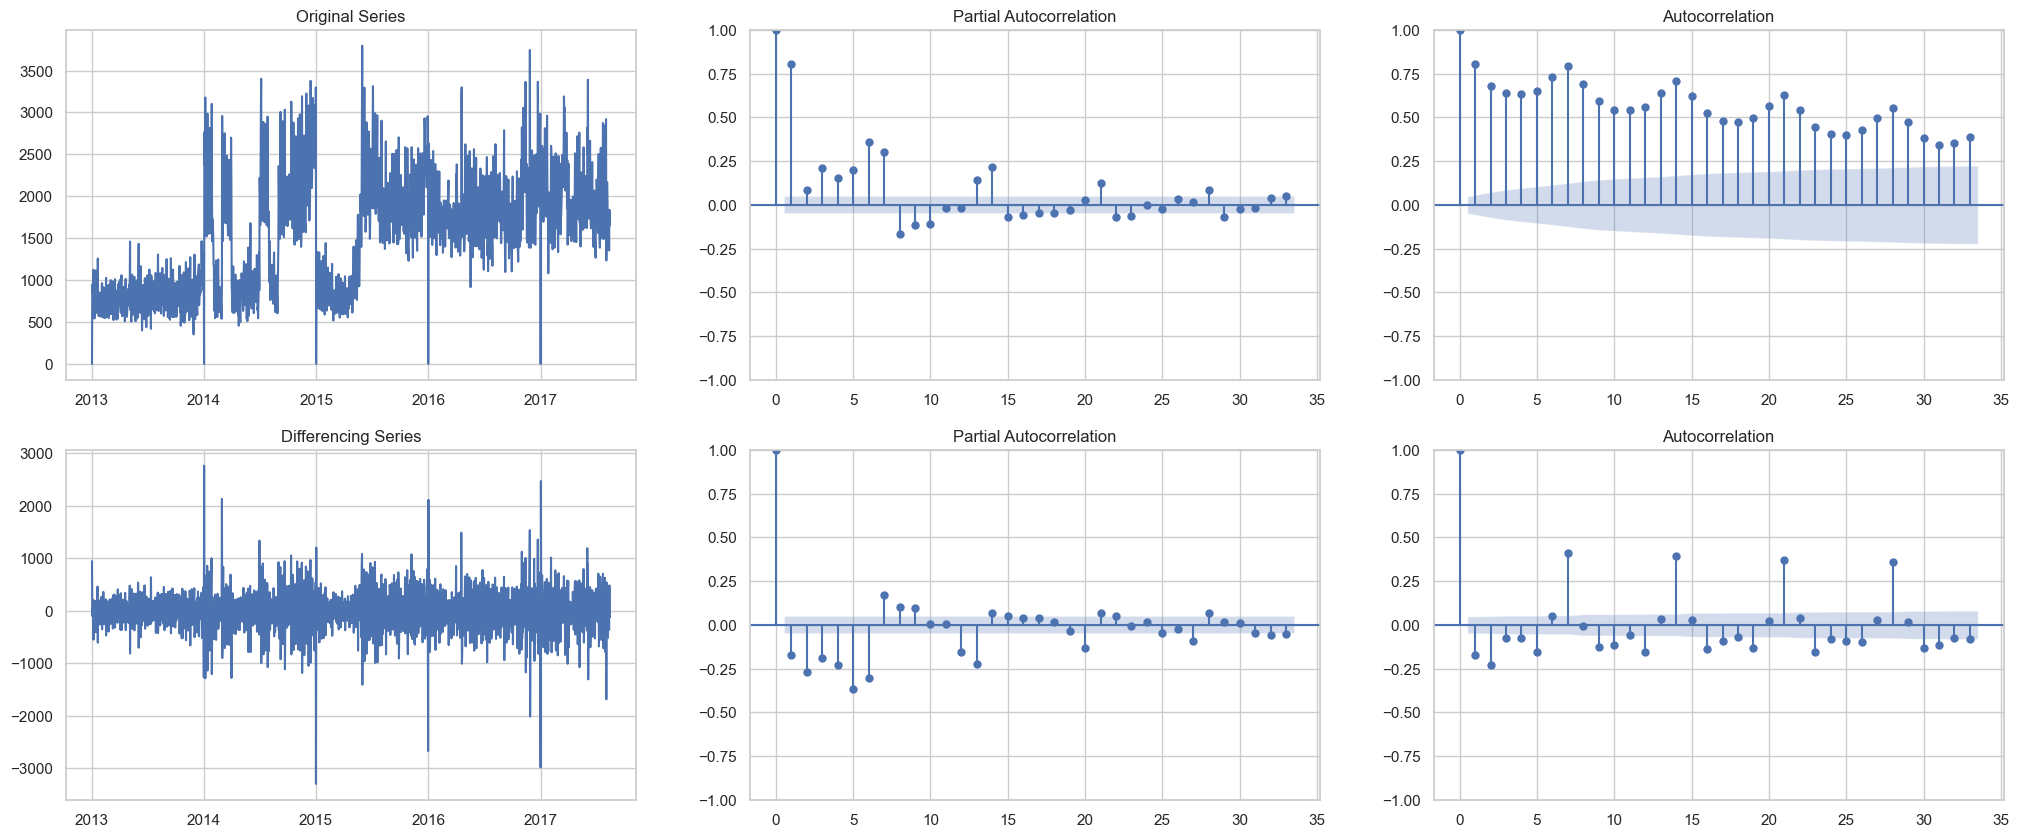

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(beverage['sales'])
ax[0, 1] = plot_pacf(beverage['sales'], ax=ax[0, 1])
ax[0, 2] = plot_acf(beverage['sales'], ax=ax[0, 2])

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(beverage['sales'].diff().dropna())
ax[1, 1] = plot_pacf(beverage['sales'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(beverage['sales'].diff().dropna(), ax=ax[1, 2])


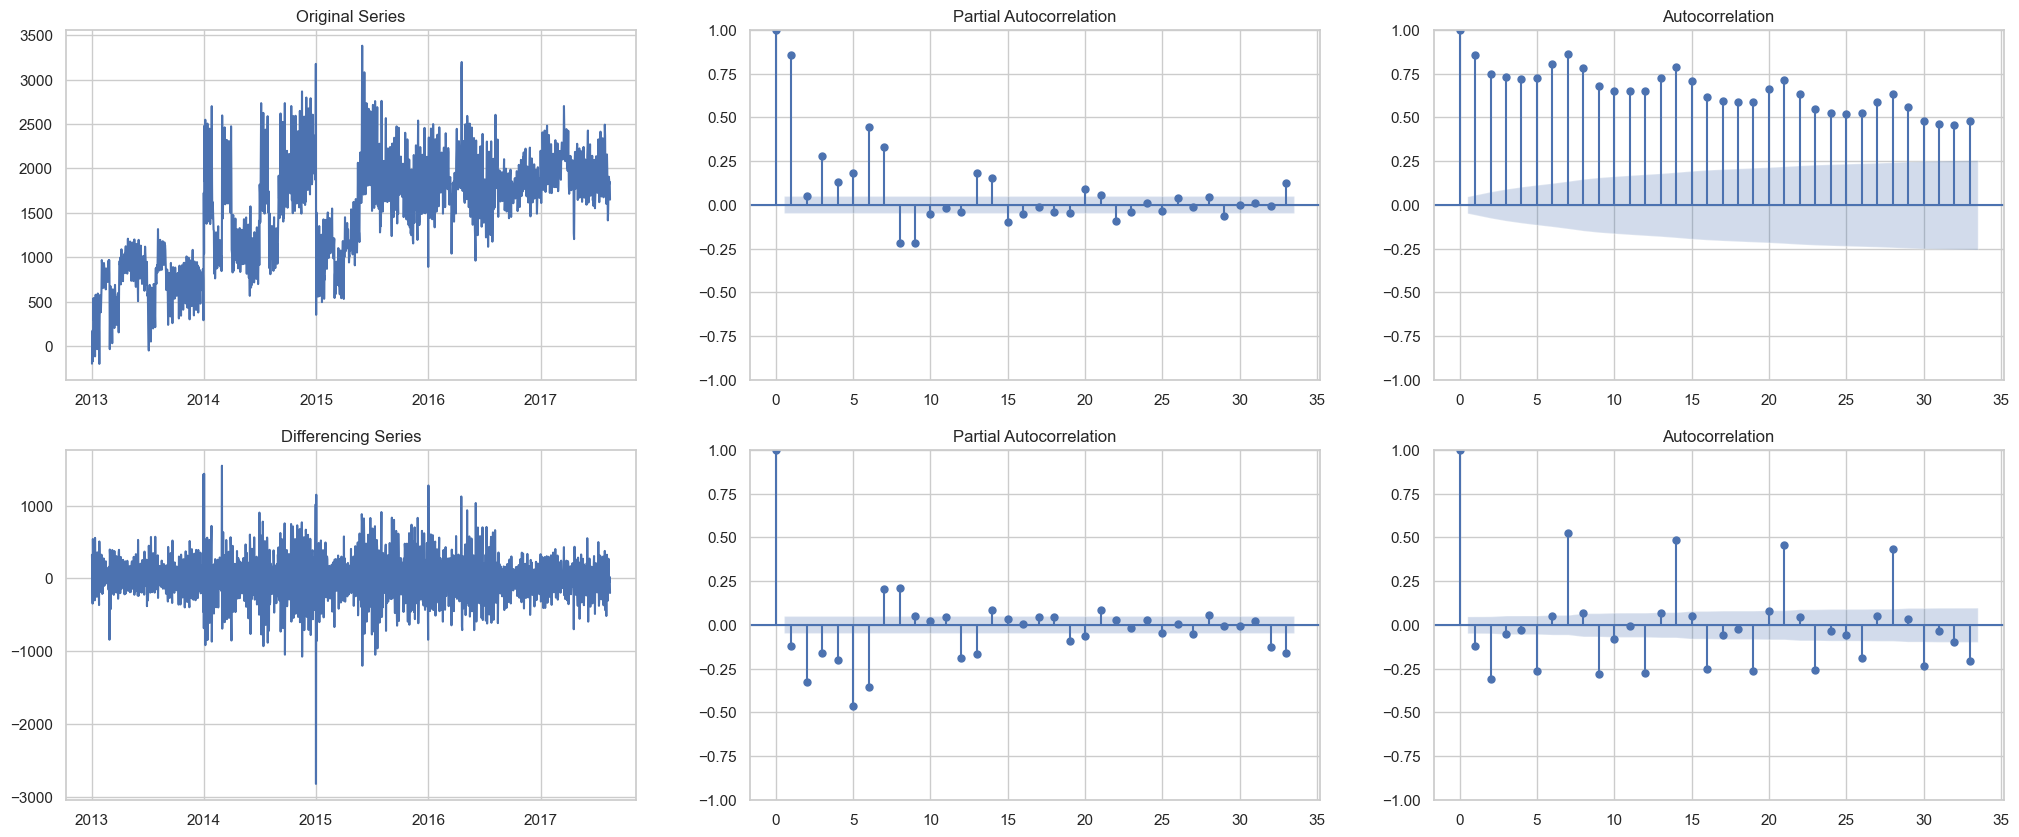

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(beverage['sales_sa'])
ax[0, 1] = plot_pacf(beverage['sales_sa'], ax=ax[0, 1])
ax[0, 2] = plot_acf(beverage['sales_sa'], ax=ax[0, 2])

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(beverage['sales_sa'].diff().dropna())
ax[1, 1] = plot_pacf(beverage['sales_sa'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(beverage['sales_sa'].diff().dropna(), ax=ax[1, 2])


array([[<Axes: title={'center': 'sales'}>]], dtype=object)

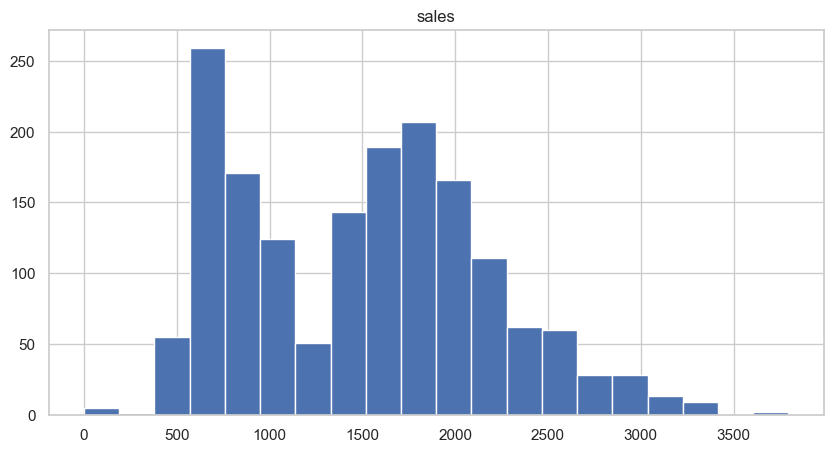

In [25]:
beverage.hist('sales', figsize=(10, 5), bins=20)

## Feature Engineering

In [26]:
beverage['dcoilwtico'] = beverage['dcoilwtico'].fillna(method='bfill')
beverage['dcoilwtico_diff'] = beverage['dcoilwtico'].diff().fillna(method='bfill')
beverage

C:\Users\marie\AppData\Local\Temp\ipykernel_13908\2575859947.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  beverage['dcoilwtico'] = beverage['dcoilwtico'].fillna(method='bfill')
C:\Users\marie\AppData\Local\Temp\ipykernel_13908\2575859947.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  beverage['dcoilwtico_diff'] = beverage['dcoilwtico'].diff().fillna(method='bfill')


,id,store_nbr,family,sales,onpromotion,dcoilwtico,year,month,day,day_of_week,sales_sa,dcoilwtico_diff
date,,,,,,,,,,,,
2013-01-01,1455,5,BEVERAGES,0.0,0,93.14,2013,1,1,1,-198.602993,0.00
2013-01-02,3237,5,BEVERAGES,947.0,0,93.14,2013,1,2,2,127.233907,0.00
2013-01-03,5019,5,BEVERAGES,847.0,0,92.97,2013,1,3,3,174.275081,-0.17
2013-01-04,6801,5,BEVERAGES,859.0,0,93.12,2013,1,4,4,-171.552940,0.15
2013-01-05,8583,5,BEVERAGES,912.0,0,93.20,2013,1,5,5,371.095670,0.08
2013-01-06,10365,5,BEVERAGES,1124.0,0,93.20,2013,1,6,6,540.102560,0.00
2013-01-07,12147,5,BEVERAGES,575.0,0,93.20,2013,1,7,0,288.224467,0.00
2013-01-08,13929,5,BEVERAGES,746.0,0,93.21,2013,1,8,1,459.709598,0.01
2013-01-09,15711,5,BEVERAGES,541.0,0,93.08,2013,1,9,2,293.074167,-0.13


In [28]:
beverage.isnull().sum()

id                 0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico         0
year               0
month              0
day                0
day_of_week        0
sales_sa           0
dcoilwtico_diff    0
dtype: int64

In [29]:
beverage['sales_mean_7'] = beverage['sales'].rolling(window=7).mean()
beverage['sales_mean_30'] = beverage['sales'].rolling(window=30).mean()
beverage

,id,store_nbr,family,sales,onpromotion,dcoilwtico,year,month,day,day_of_week,sales_sa,dcoilwtico_diff,sales_mean_7,sales_mean_30
date,,,,,,,,,,,,,,
2013-01-01,1455,5,BEVERAGES,0.0,0,93.14,2013,1,1,1,-198.602993,0.00,NaN,NaN
2013-01-02,3237,5,BEVERAGES,947.0,0,93.14,2013,1,2,2,127.233907,0.00,NaN,NaN
2013-01-03,5019,5,BEVERAGES,847.0,0,92.97,2013,1,3,3,174.275081,-0.17,NaN,NaN
2013-01-04,6801,5,BEVERAGES,859.0,0,93.12,2013,1,4,4,-171.552940,0.15,NaN,NaN
2013-01-05,8583,5,BEVERAGES,912.0,0,93.20,2013,1,5,5,371.095670,0.08,NaN,NaN
2013-01-06,10365,5,BEVERAGES,1124.0,0,93.20,2013,1,6,6,540.102560,0.00,NaN,NaN
2013-01-07,12147,5,BEVERAGES,575.0,0,93.20,2013,1,7,0,288.224467,0.00,752.000000,NaN
2013-01-08,13929,5,BEVERAGES,746.0,0,93.21,2013,1,8,1,459.709598,0.01,858.571429,NaN
2013-01-09,15711,5,BEVERAGES,541.0,0,93.08,2013,1,9,2,293.074167,-0.13,800.571429,NaN


In [31]:
train = beverage[:-30]
test = beverage[-30:]
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (1654, 14)
Test shape: (30, 14)


## Modeling

### SARIMAX (p,d,q)

In [104]:
model_sarimax = ARIMA(train['sales'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 7), trend = 'ct', exog=train[['onpromotion', 'dcoilwtico_diff']], missing = 'drop')
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.summary())

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:                           sales   No. Observations:                 1654
Model:             ARIMA(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood              -11779.500
Date:                         Fri, 15 Mar 2024   AIC                          23577.000
Time:                                 22:22:30   BIC                          23625.699
Sample:                                      0   HQIC                         23595.053
                                        - 1654                                         
Covariance Type:                           opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             833.4181    439.902      1.895      0.058     -28.774    1695.610
drift               0.5696      0.427      1

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


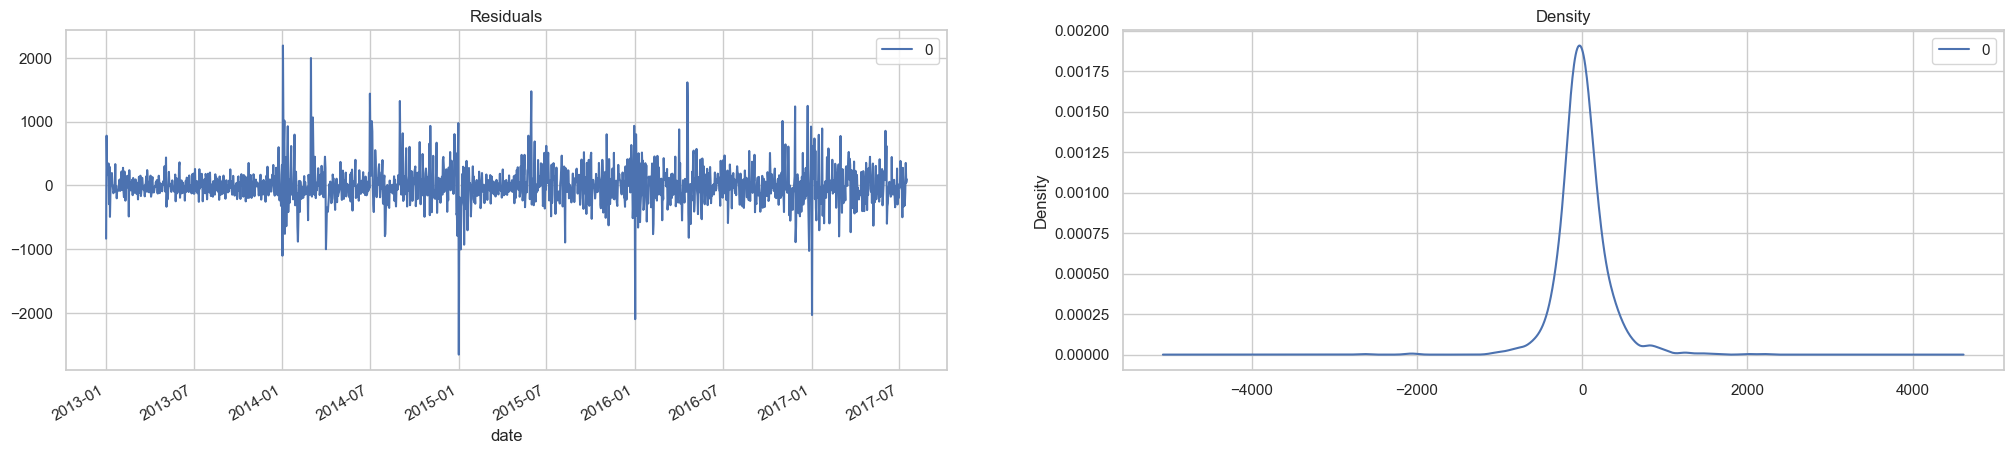

In [105]:
residuals = pd.DataFrame(model_sarimax_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


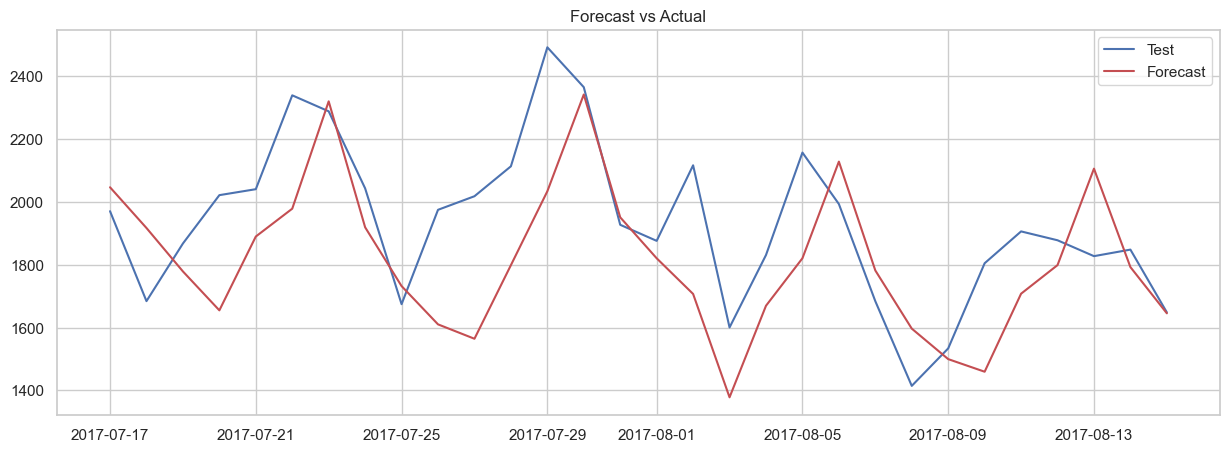

In [106]:
exog_forecast = test[['onpromotion', 'dcoilwtico_diff']]  # Ambil nilai eksogen dari data uji
forecast = model_sarimax_fit.predict(start=len(train), end=len(train)+len(test)-1, exog=exog_forecast, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales_sa'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [107]:
forecastSARIMAX = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastSARIMAX

,test,forecast
date,,
2017-07-17,2051.0,2046.586597
2017-07-18,1497.0,1916.964976
2017-07-19,1875.0,1778.771689
2017-07-20,1646.0,1654.910303
2017-07-21,1675.0,1889.816957
2017-07-22,2169.0,1978.465211
2017-07-23,2874.0,2320.096643
2017-07-24,2161.0,1919.263767
2017-07-25,1489.0,1732.107472


In [108]:
mse = mean_squared_error(test['sales'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['sales'], forecast)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


MSE: 117778.40694398181
RMSE: 343.18858801536777
MAE: 240.7544093581218


### LSTM

In [37]:
ind_scaler = MinMaxScaler()
sales_scaler = MinMaxScaler()
x = beverage[['onpromotion', 'dcoilwtico']].copy()
y = beverage['sales'].copy()

x['dcoilwtico'] = ind_scaler.fit_transform(x['dcoilwtico'].values.reshape(-1, 1))
x['onpromotion'] = ind_scaler.fit_transform(x['onpromotion'].values.reshape(-1, 1))
y = sales_scaler.fit_transform(y.values.reshape(-1, 1))

In [38]:
x

,onpromotion,dcoilwtico
date,,
2013-01-01,0.000000,0.792965
2013-01-02,0.000000,0.792965
2013-01-03,0.000000,0.790951
2013-01-04,0.000000,0.792728
2013-01-05,0.000000,0.793675
2013-01-06,0.000000,0.793675
2013-01-07,0.000000,0.793675
2013-01-08,0.000000,0.793794
2013-01-09,0.000000,0.792254


In [39]:
def load_data(X, seq_len, test_size=30):
    amount_of_features = X.shape[1]
    X_mat = X.values
    sequence_length = seq_len + 1
    data = []
    
    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])
    
    data = np.array(data)
    train_data = data[:-test_size]  # Exclude last 'test_size' data points for test set
    
    x_train = train_data[:, :-1]
    y_train = train_data[:, -1][:,-1]
    
    x_test = data[-test_size:, :-1] 
    y_test = data[-test_size:, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return x_train, y_train, x_test, y_test

window = 7
x['sales'] = y
X_train, y_train, X_test, y_test = load_data(x, window,test_size=30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1646, 7, 3) (1646,) (30, 7, 3) (30,)


In [51]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(units=64, input_shape=(window, 3), return_sequences=True))
modelLSTM.add(LSTM(units=32))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [earlystop]

modelLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [52]:
cp = ModelCheckpoint('modelLSTM/', save_best_only=True)
modelLSTM.compile(optimizer='adam', loss='mse', metrics = [RootMeanSquaredError()])

In [53]:
start = time.time()
history1=modelLSTM.fit(X_train,y_train,epochs=100,batch_size=32, validation_split=0.05, verbose=1, callbacks=callbacks_list)
print ('compilation time : ', time.time() - start)

Epoch 1/100


49/49 [==============================] - 4s 27ms/step - loss: 0.0666 - root_mean_squared_error: 0.2580 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0944
Epoch 2/100
49/49 [==============================] - 0s 10ms/step - loss: 0.0141 - root_mean_squared_error: 0.1187 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0947
Epoch 3/100
49/49 [==============================] - 0s 10ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0942
Epoch 4/100
49/49 [==============================] - 0s 9ms/step - loss: 0.0124 - root_mean_squared_error: 0.1112 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0940
Epoch 5/100
49/49 [==============================] - 0s 9ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0942
Epoch 6/100
49/49 [==============================] - 0s 9ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0089 - val_root_mean_squar

In [54]:
trainPredict = modelLSTM.predict(X_train)
testPredict = modelLSTM.predict(X_test)

trainPredict = sales_scaler.inverse_transform(trainPredict)
trainY = sales_scaler.inverse_transform([y_train])
testPredict = sales_scaler.inverse_transform(testPredict)
testY = sales_scaler.inverse_transform([y_test])

plot_predicted = testPredict.copy()
plot_predicted = plot_predicted.reshape(30, 1)
plot_actual = testY.copy()
plot_actual = plot_actual.reshape(30, 1)
print(plot_actual.shape)
print(plot_predicted.shape)

1/1 [==============================] - 0s 18ms/step
(30, 1)
(30, 1)


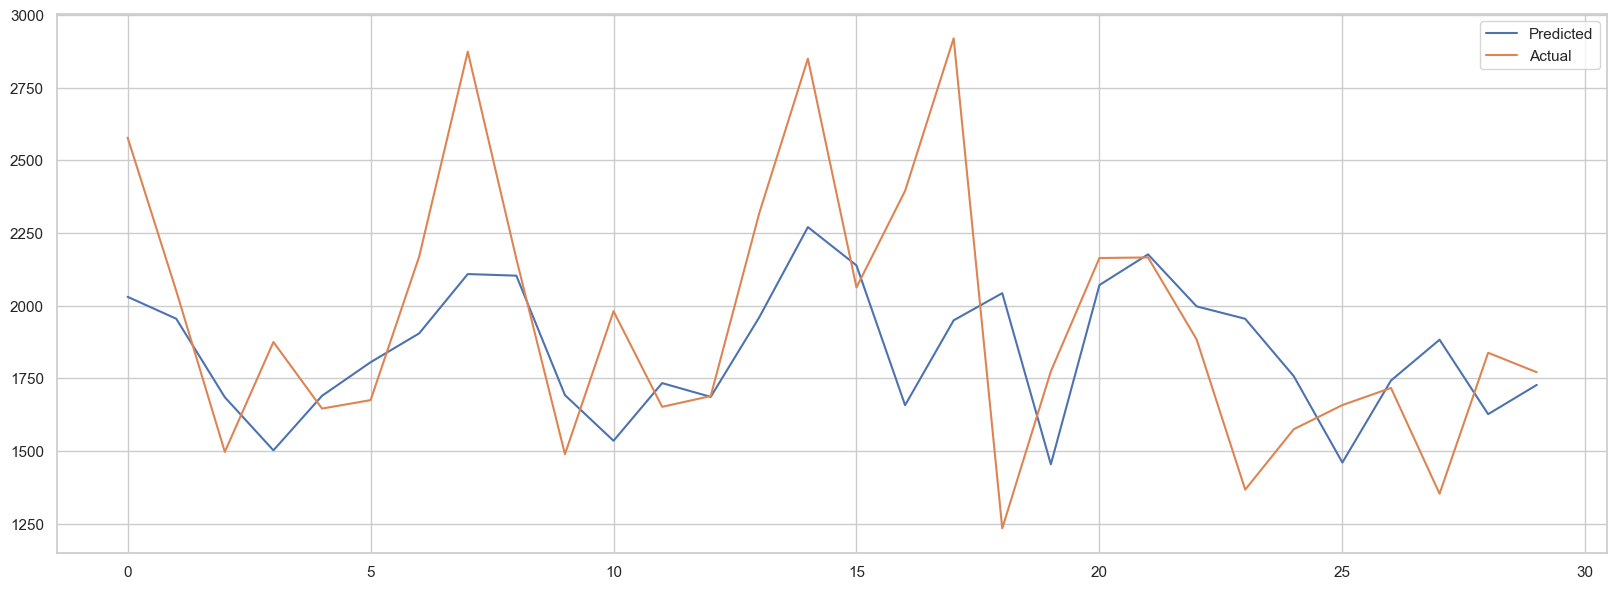

In [55]:
plt.figure(figsize=(20,7))
plt.plot(pd.DataFrame(plot_predicted), label='Predicted')
plt.plot(pd.DataFrame(plot_actual), label='Actual')
plt.legend(loc='best')
plt.show()

In [56]:
# Input into pandas dataframe, test as index and plot_predicted as the column
# Reshape the data plot_predicted
plot_predicted = plot_predicted.reshape(30,)

forecastLSTM = pd.DataFrame({'test': test['sales'], 'forecast': plot_predicted}, index=test.index)
forecastLSTM

,test,forecast
date,,
2017-07-17,2051.0,2030.514648
2017-07-18,1497.0,1955.104614
2017-07-19,1875.0,1685.029175
2017-07-20,1646.0,1502.202637
2017-07-21,1675.0,1689.825439
2017-07-22,2169.0,1805.440918
2017-07-23,2874.0,1904.760620
2017-07-24,2161.0,2108.843018
2017-07-25,1489.0,2103.244629


In [57]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(loss))

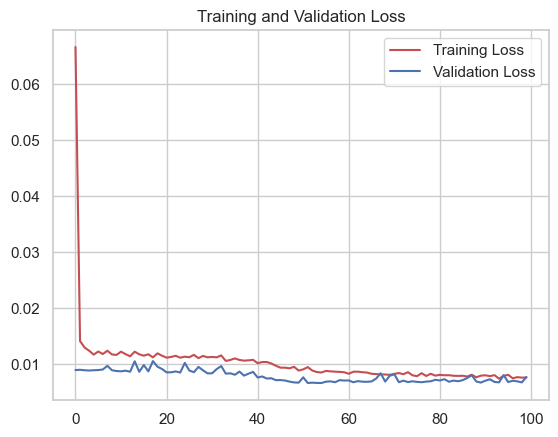

<Figure size 640x480 with 0 Axes>

In [58]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [59]:
y_pred = modelLSTM.predict(X_test)

1/1 [==============================] - 0s 19ms/step


In [60]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


MSE: 0.011307061735553342
RMSE: 0.10633466854960023
MAE: 0.07942693567209005
